# News Classification

In this final project for Supervised Text Classification for Marketing Analytics, the goal is to create a supervised learning model that accurately predicts if a text article is about "Health and Wellness" or not.

The dataset provided has approximately 200,000 news headlines from the year 2012 to 2018 from [HuffPost](https://www.huffpost.com/).

## Data Exploration

The data was loaded to a google drive, and that will be mounted with this code:

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, the dataset will be imported to the notebook.

In [2]:
# load json file
import json

# open the file
with open('/content/drive/MyDrive/Marketing Analytics/data/news_data.json') as f:
    dataset = json.load(f)

# print the first few lines
for key in list(dataset.keys()):
    for key2 in list(dataset[key].keys())[:5]:
        print(f'{key}: \"{key2}\": \"{dataset[key][key2]}\"')

category: "0": "CRIME"
category: "1": "ENTERTAINMENT"
category: "2": "ENTERTAINMENT"
category: "3": "ENTERTAINMENT"
category: "4": "ENTERTAINMENT"
headline: "0": "There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV"
headline: "1": "Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song"
headline: "2": "Hugh Grant Marries For The First Time At Age 57"
headline: "3": "Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork"
headline: "4": "Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog"
authors: "0": "Melissa Jeltsen"
authors: "1": "Andy McDonald"
authors: "2": "Ron Dicker"
authors: "3": "Ron Dicker"
authors: "4": "Ron Dicker"
link: "0": "https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89"
link: "1": "https://www.huffingtonpost.com/entry/will-smith-joins-diplo-and-nicky-jam-for-the-official-2018-world-cup-song_us_5b09726fe4b0fdb2aa541201"
link: "2": "https://www.huffi

Interestingly, two items pop out as useful for text analysis: "short_description" and "headline." The labels will be "category." For ease of use, a training dataset will be generated concatenating the short description and the headline.

In [3]:
# create a train and label dataset, maintaining index in each list
import pandas as pd

# establish desired keys
train_keys = ['headline', 'short_description']
label_key = 'category'

# establish lists
train_list = [' ']*len(dataset['category'])
label_list = [' ']*len(dataset['category'])

# iterate through dataset
for key in train_keys:
  for i in range(len(dataset['category'])):
    train_list[i] += ' ' + dataset[key][str(i)]
    train_list[i] = train_list[i].strip()

for i in range(len(dataset['category'])):
  if dataset[label_key][str(i)] in ["WELLNESS", "HEALTHY LIVING"]:
    label_list[i] = 1
  else:
    label_list[i] = 0

# print subset for visualization
for i in range(5):
  print(f'Train: \"{train_list[i]}\", Label: \"{label_list[i]}\"')

# count how many labels = 1 and how many = 0
print(f'Number of labels = 1: {label_list.count(1)}')
print(f'Number of labels = 0: {label_list.count(0)}')
print(f'Number of labels: {len(label_list)}')

Train: "There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV She left her husband. He killed their children. Just another day in America.", Label: "0"
Train: "Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song Of course it has a song.", Label: "0"
Train: "Hugh Grant Marries For The First Time At Age 57 The actor and his longtime girlfriend Anna Eberstein tied the knot in a civil ceremony.", Label: "0"
Train: "Jim Carrey Blasts 'Castrato' Adam Schiff And Democrats In New Artwork The actor gives Dems an ass-kicking for not fighting hard enough against Donald Trump.", Label: "0"
Train: "Julianna Margulies Uses Donald Trump Poop Bags To Pick Up After Her Dog The "Dietland" actress said using the bags is a "really cathartic, therapeutic moment."", Label: "0"
Number of labels = 1: 24521
Number of labels = 0: 176332
Number of labels: 200853


Now that the dataset is prepped, some preprocessing is necessary:

* Remove stopwords
* Tokenize and get a library of words
* Pad sequences for normalized inputs to model

In [4]:
# preprocess the data
try:
  from tensorflow.keras.preprocessing.text import Tokenizer
except:
  !pip install keras
  !pip install tensorflow
  from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

train_list = [remove_stopwords(text) for text in train_list]

# create tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_list)

# save sequences
sequences = tokenizer.texts_to_sequences(train_list)
with open('/content/drive/MyDrive/Marketing Analytics/data/sequences.json', 'w') as f:
  json.dump(sequences, f)

# save word index
word_index = tokenizer.word_index
with open('/content/drive/MyDrive/Marketing Analytics/data/word_index.json', 'w') as f:
  json.dump(word_index, f)
print(f'Found {len(word_index)} unique tokens.')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Found 115074 unique tokens.


The final step is to pad each sequence to the same length.

In [5]:
# pad each sequence to the max_length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# find max length
max_length = 0
for i in range(len(train_list)):
  if len(train_list[i]) > max_length:
    max_length = len(sequences[i])

# pad each sequence
train_list = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# print subset
for i in range(5):
  print(f'Train: \"{train_list[i]}\", Label: \"{label_list[i]}\"')

Train: "[ 158 1236 2914  595   55   27  131  357  366  529  468   66  102    8
  123    0    0    0    0    0    0    0    0]", Label: "0"
Train: "[ 1509  2885 25903 25904  5184  2493    15 36050   881   907   433   907
     0     0     0     0     0     0     0     0     0     0     0]", Label: "0"
Train: "[ 5823  5243  8038    14     4   313  8428   870  5244  2348  2559 64072
  2448  3430  1002  2013     0     0     0     0     0     0     0]", Label: "0"
Train: "[ 2631 13343  3504 64073  2213 13023   469     1  6622   870   634  5319
  4963  5185   858   210   214    28     3     0     0     0     0]", Label: "0"
Train: "[40975 36051  1422    28     3  7871  3058   877   490 64074   704    22
   493  3058    56 27743  9506   267     0     0     0     0     0]", Label: "0"


## Set up Neural Network
The data is preprocessed, and now the model must be prepared. This model will follow the attention method for recurrent neural networks.

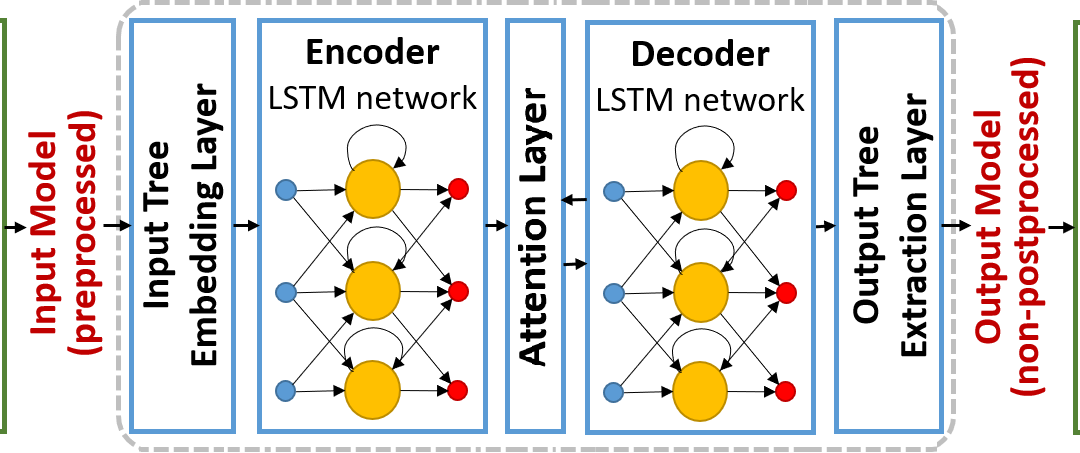

*Source: [Modeling Languages](https://modeling-languages.com/lstm-neural-network-model-transformations/)*

Since the target customer for this project is more interested in correct classification of Wellness and Health, percision is the chosen metric for grading performance.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, AdditiveAttention, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model

#----------------- Architecture -----------------#
# input layer
input = Input(shape=(max_length,))
# embedding layer
embedding = Embedding(len(word_index) + 1, 128)(input)
# first LSTM layer
lstm1 = LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(embedding)
# attention layer
attention = AdditiveAttention()([lstm1, lstm1])
# second LSTM layer
lstm2 = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(attention)
# flatten before dense layer
flatten = Flatten()(lstm2)
# fully connected layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)
# output
output = Dense(1, activation='sigmoid')(dense3)
#----------------- Architecture -----------------#

# build the model
model = Model(inputs=input, outputs=output)

# compile for binary classification and precision
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['precision'])

# print summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 23)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 23, 128)        │     14,729,600 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 23, 128)        │        131,584 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ additive_attention_1      │ (None, 23, 128)        │            128 │ lstm_2[0][0],          │
│ (AdditiveAttention)       │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 128)            │        131,584 │ additive_attention_1[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 128)            │              0 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │         16,512 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 64)             │          8,256 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 32)             │          2,080 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 1)              │             33 │ dense_6[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 15,019,777 (57.30 MB)

 Trainable params: 15,019,777 (57.30 MB)

 Non-trainable params: 0 (0.00 B)

After architecture, the train dataset will be split for train and validation. Then, ktrain will be used to train the model.

In [19]:
# split train and validation dataset
x_train, y_train = train_list[:int(len(train_list)*0.8)], label_list[:int(len(train_list)*0.8)]
x_val, y_val = train_list[int(len(train_list)-len(x_train)):], label_list[int(len(train_list)-len(y_train)):]
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

# convert to numpy
import numpy as np
x_train = np.array(x_train).astype('int')
y_train = np.array(y_train).astype('int')
x_val = np.array(x_val).astype('int')
y_val = np.array(y_val).astype('int')

160682
160682
160682
160682


In [20]:
# connect to GPU compute
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Tue Mar  4 14:01:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P0             53W /  400W |     949MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [21]:
# fit the model
hist = model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 621s 124ms/step - loss: 0.0824 - precision: 0.8539 - val_loss: 0.1090 - val_precision: 0.9085
Epoch 2/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 619s 123ms/step - loss: 0.0540 - precision: 0.9010 - val_loss: 0.1063 - val_precision: 0.9090
Epoch 3/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 621s 124ms/step - loss: 0.0328 - precision: 0.9422 - val_loss: 0.1194 - val_precision: 0.9191
Epoch 4/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 624s 124ms/step - loss: 0.0202 - precision: 0.9619 - val_loss: 0.1678 - val_precision: 0.9293
Epoch 5/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 627s 125ms/step - loss: 0.0136 - precision: 0.9768 - val_loss: 0.1802 - val_precision: 0.9293
Epoch 6/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 622s 124ms/step - loss: 0.0083 - precision: 0.9853 - val_loss: 0.2511 - val_precision: 0.9414
Epoch 7/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 622s 124ms/step - loss: 0.0050 - precision: 0.9918 - val_loss: 0.2061 - val_precision: 0.9344
Epoch 8/15
5022/5022 ━━━━━━━━━━━━━━━━━━━━ 623s 1

5022/5022 ━━━━━━━━━━━━━━━━━━━━ 99s 20ms/step


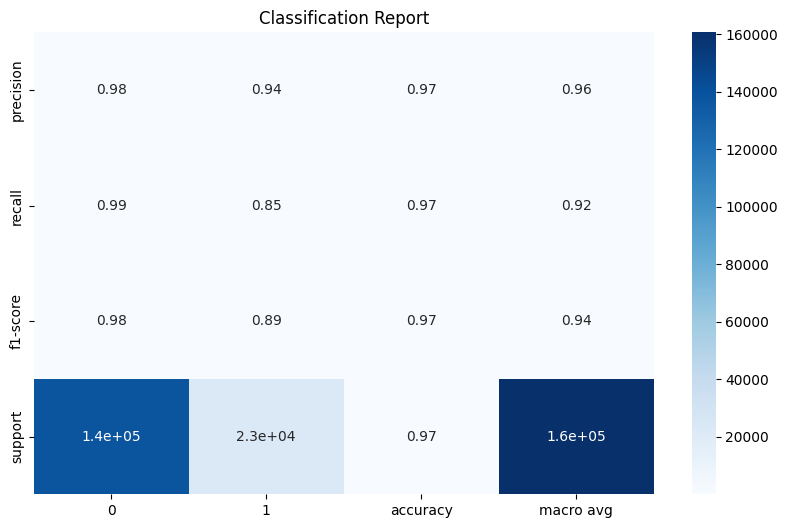

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# run validation predictions
y_pred = model.predict(x_val)
y_pred = (y_pred > 0.5).astype("int32")

# get the classification report
report = classification_report(y_val, y_pred, target_names=['0', '1'], output_dict=True)

# convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

## Conclusion

The LSTM architecture with an Attention layer performed quite well in overall metrics. It is no wonder why so many data science forums rave about this method.

However, a score this high does beg the question of overfitting. For further work, one could rerun the simulation with a holdout set (mentioned in the lectures) to validate on as well.

Takeaways:

*   LSTM with Attention can be very accurate
*   Use a holdout set, apart from training and validation sets, to verify the model is not overfit.

